In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM4_video_07-17-24_D1_P2DLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M4_D1_P2_07-17-24_videoTime0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M4_D1_P2_07-17-24_stimulusTime0.csv'

north_pixel = 124
south_pixel = 445
east_pixel = 487
west_pixel = 146
shelter_x_pixel = 317
shelter_y_pixel = 421

#estimate for when mouse reaches shelter
escape_done = 30 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 2)
convert_time(time_path, coords, audio_path, 2)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

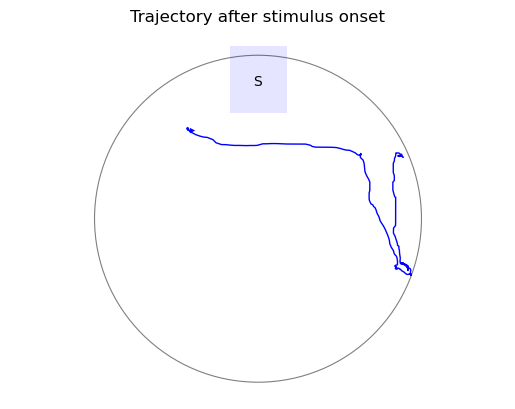

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

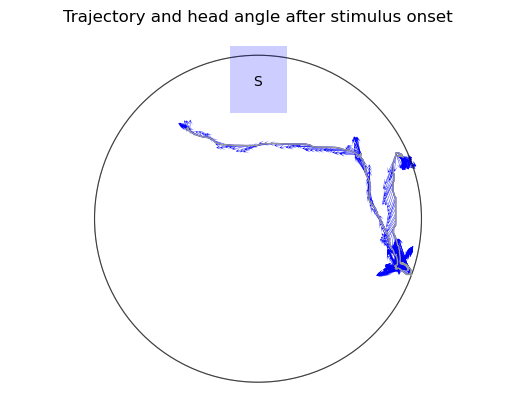

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

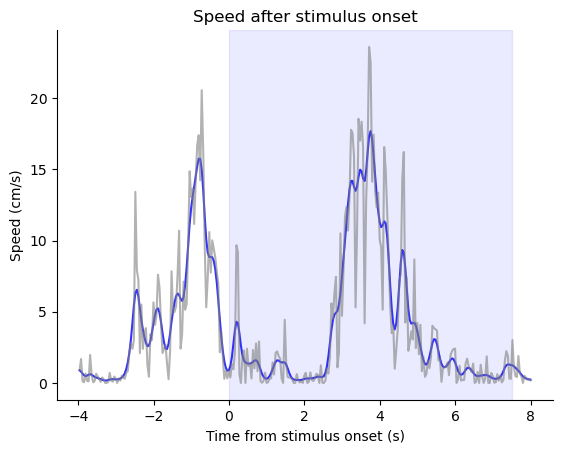

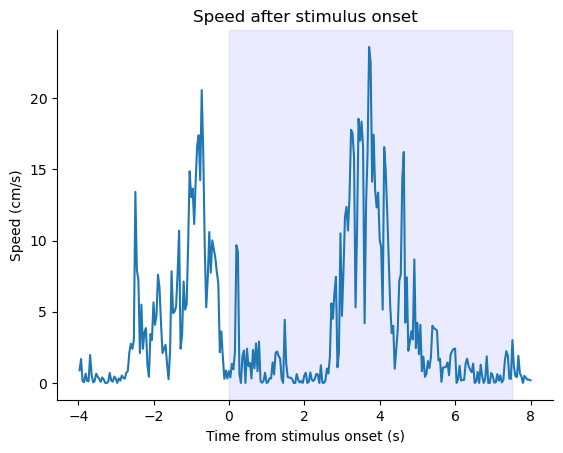

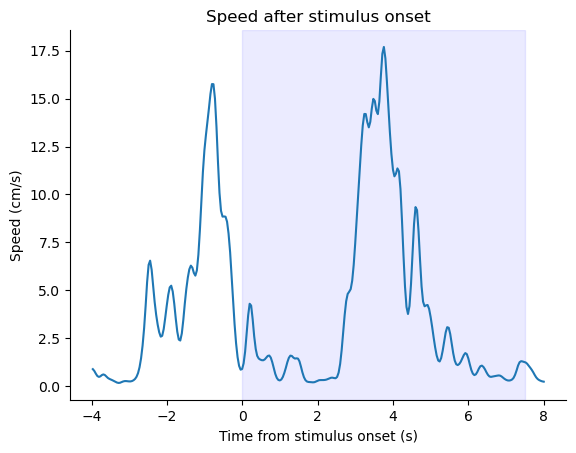

In [15]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, False, False, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

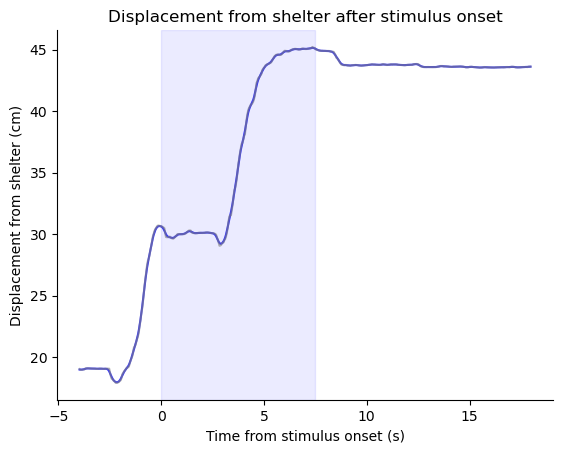

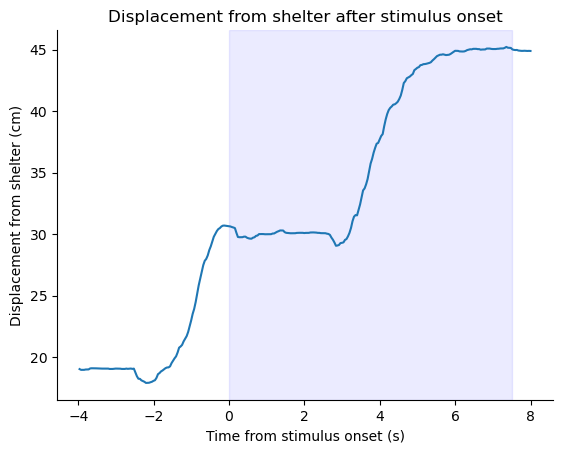

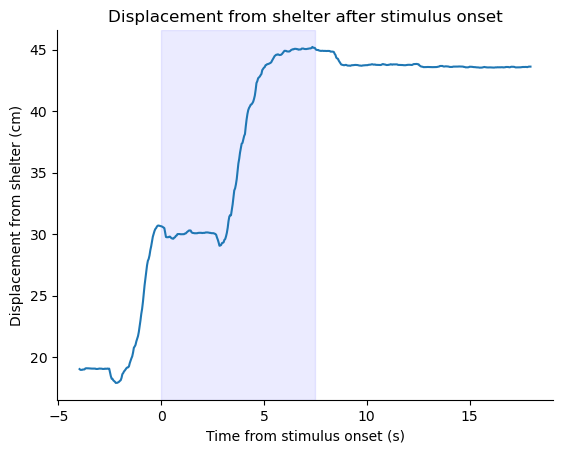

In [16]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 8, coord_scaled, False, False, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

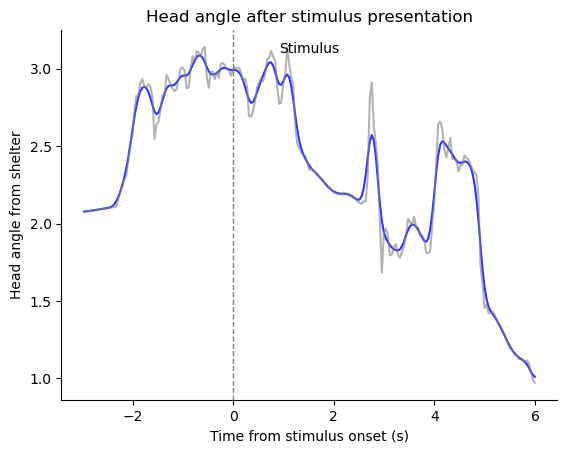

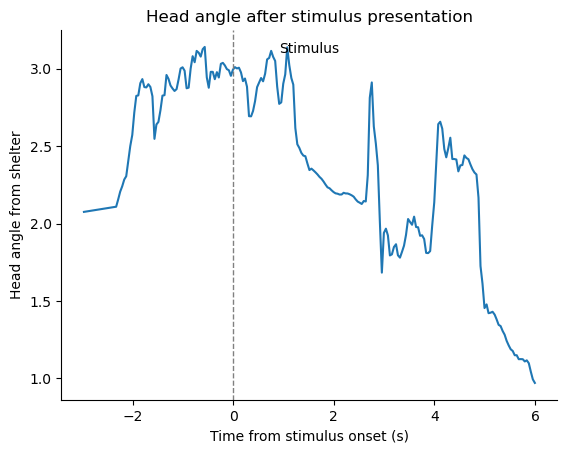

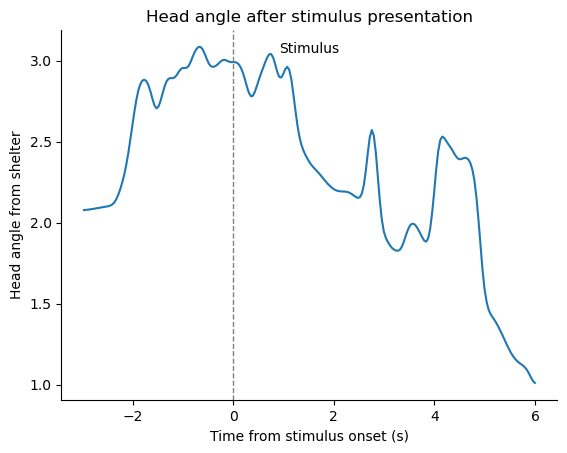

In [17]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [18]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [19]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [20]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9086,9086,9086,NaN,NaN,0.810483,29.380616,11.076111,0.997908,29.672359,11.808649,...,0.999612,23.545515,13.176986,0.999971,0.195840,30.108858,9.676475,0.383837,NaN,NaN
9087,9087,9087,NaN,NaN,0.821170,28.739651,11.076111,0.999117,29.126203,11.798198,...,0.999736,23.416439,13.187540,0.999966,0.235559,29.769334,9.204633,0.365599,NaN,NaN
9088,9088,9088,NaN,NaN,0.793201,28.562633,10.857153,0.999625,29.107468,11.529082,...,0.999742,23.390661,13.187540,0.999962,0.275584,29.747965,0.606543,0.024277,NaN,NaN
9096,9096,9096,NaN,NaN,0.870357,28.348716,10.748144,0.999818,28.718120,11.510786,...,0.999861,23.392200,13.184577,0.999969,0.595623,29.629190,0.311031,0.012445,NaN,NaN
9097,9097,9097,NaN,NaN,0.732181,28.476728,10.824063,0.999669,28.856696,11.588415,...,0.999825,23.434673,13.159692,0.999952,0.635802,29.710839,2.314153,0.092980,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,9277,9277,NaN,NaN,0.000236,29.816050,-11.043763,0.998434,30.394103,-10.639251,...,0.999883,25.625569,-6.624211,0.999750,7.837812,44.907764,0.498700,0.019916,NaN,NaN
9278,9278,9278,NaN,NaN,0.000147,29.821378,-11.043763,0.997221,30.387711,-10.639251,...,0.999839,25.630607,-6.624211,0.999600,7.877453,44.898739,0.367148,0.014554,NaN,NaN
9279,9279,9279,NaN,NaN,0.000169,29.828726,-11.049026,0.999161,30.387711,-10.659357,...,0.999869,25.630607,-6.636398,0.999635,7.917479,44.891598,0.227402,0.009102,NaN,NaN
9280,9280,9280,NaN,NaN,0.000187,29.828726,-11.061816,0.998878,30.384239,-10.667995,...,0.999880,25.630607,-6.636398,0.999731,7.957504,44.898342,0.234123,0.009371,NaN,NaN


In [21]:
rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)

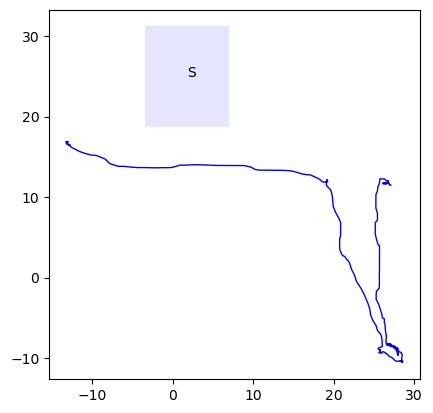

In [22]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [23]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)